In [1]:
import gp_dyn
import bnn_dyn

from gpflow.kernels import RBF
from gp_dyn.manifold_gp.gpflow_nn_ker import NNFeaturedSE
from gp_dyn.gp_dyn import GaussianProcessDynamics
from bnn_dyn.bnn_dyn import BNNDynamics

from dynamics_predictor import DynamicsPredictor

import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


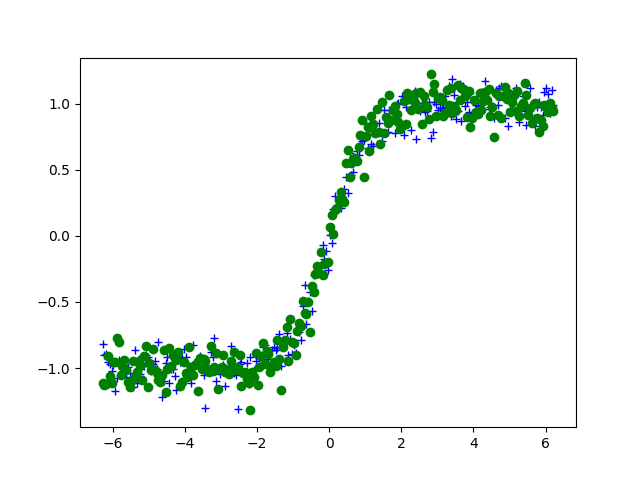

In [2]:
#prepare some data
#1-dim, sinoudal
dt = 0.05
nonlinearity = np.tanh
t_train = np.arange(-2*np.pi, 2*np.pi, dt)
tol_train = nonlinearity(t_train) + np.random.randn(len(t_train))*.1
x_train = tol_train[:-1]
y_train = tol_train[1:]

t_test = np.arange(-2*np.pi, 2*np.pi, dt)
tol_test = nonlinearity(t_test) + np.random.randn(len(t_test))*.1
x_test = tol_test[:-1]
y_test = tol_test[1:]

x_train = np.array([x_train]).T
y_train = np.array([y_train]).T
x_test = np.array([x_test]).T
y_test = np.array([y_test]).T

#show them
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_train[:-1], x_train, 'b+')
ax.plot(t_test[:-1], x_test, 'go')



In [3]:
#train dynamics model to fit it
#no control input here, hooray!
# model = DynamicsPredictor(model=GaussianProcessDynamics(kern=RBF(1)))

#how about bnn
model = DynamicsPredictor(model=BNNDynamics(layers=[1, 5, 1], name="bnn1d"))
model.train(x_train, y_train)


Created an ensemble of 5 neural networks with variance predictions.


Network training: 100%|██████████| 100/100 [00:01<00:00, 81.05epoch(s)/s, Training loss(es)=[0.03663779 0.01562151 0.01863669 0.0183115  0.018074  ]]


<IPython.core.display.Javascript object>


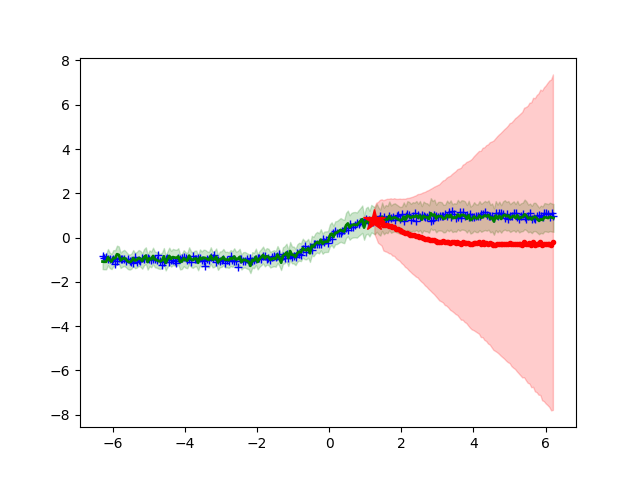

In [4]:
#see the prediction
y_test_pred_mean, y_test_pred_var = model.predict(x_test)
#now long-term prediction from a random point between (-np.pi/2, np.pi/2)
t0 = np.array([[np.random.rand() * 2*np.pi - np.pi]])*.5
x0 = nonlinearity(t0) + np.random.randn()*.1
n_steps = 100
t_future = np.arange(n_steps)*dt + t0[0]
x_traj_mu, x_traj_var = model.predict_n_steps(n_steps, x0)
x_traj_mu = np.array(x_traj_mu)
x_traj_var = np.array(x_traj_var)
# print(x_traj_mu.shape)
# print(x_traj_var.shape)
# print(x_traj_var)

#show them
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_train[:-1], x_train, 'b+')
#one step prediction
ax.plot(t_test[:-1], y_test_pred_mean, 'g-', lw=2)
ax.fill_between(t_test[:-1], y_test_pred_mean[:, 0]-2*np.sqrt(y_test_pred_var[:, 0, 0]), y_test_pred_mean[:, 0]+2*np.sqrt(y_test_pred_var[:, 0, 0]),
               color='green', alpha=0.2)
ax.plot(t0[0], x0[0], 'r*', markersize=16)
ax.plot(t_future, x_traj_mu[:, 0, 0], 'r.-', lw=2)
ax.fill_between(t_future, x_traj_mu[:, 0, 0]-2*np.sqrt(x_traj_var[:, 0, 0, 0]), x_traj_mu[:, 0, 0]+2*np.sqrt(x_traj_var[:, 0, 0, 0]),
               color='red', alpha=0.2)

<IPython.core.display.Javascript object>


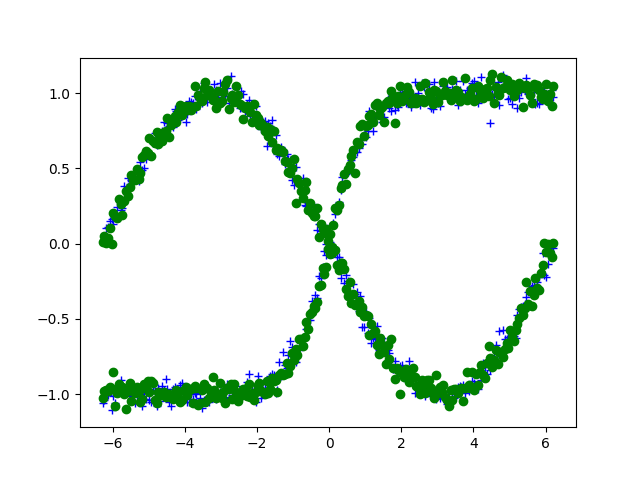

In [5]:
#prepare some data
#1-dim, sinoudal
dt = 0.05
nonlinearity_for_dim_1 = lambda x:np.tanh(x)
nonlinearity_for_dim_2 = lambda x:-np.sin(x/2)
t_train = np.arange(-2*np.pi, 2*np.pi, dt)
tol_train_dim_1 = nonlinearity_for_dim_1(t_train) + np.random.randn(len(t_train))*.05
tol_train_dim_2 = nonlinearity_for_dim_2(t_train) + np.random.randn(len(t_train))*.05
tol_train = np.vstack([tol_train_dim_1, tol_train_dim_2]).T
x_train = tol_train[:-1, :]
y_train = tol_train[1:, :]

t_test = np.arange(-2*np.pi, 2*np.pi, dt)
tol_test_dim_1 = nonlinearity_for_dim_1(t_test) + np.random.randn(len(t_test))*.05
tol_test_dim_2 = nonlinearity_for_dim_2(t_test) + np.random.randn(len(t_test))*.05
tol_test = np.vstack([tol_test_dim_1, tol_test_dim_2]).T
x_test = tol_test[:-1, :]
y_test = tol_test[1:, :]

# x_train = np.array([x_train]).T
# y_train = np.array([y_train]).T
# x_test = np.array([x_test]).T
# y_test = np.array([y_test]).T

#show them
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_train[:-1], x_train[:, 0], 'b+')
ax.plot(t_train[:-1], x_train[:, 1], 'b+')
ax.plot(t_test[:-1], x_test[:, 0], 'go')
ax.plot(t_test[:-1], x_test[:, 1], 'go')

In [6]:
import tensorflow as tf
#train dynamics model to fit it
#no control input here, hooray!
# model = DynamicsPredictor(model=GaussianProcessDynamics(kern=RBF(2)))
# model = DynamicsPredictor(model=GaussianProcessDynamics(kern=NNFeaturedSE(2, [2, 6, 3], tf.nn.softmax)))
model = DynamicsPredictor(model=BNNDynamics(layers=[2, 5, 2], name='bnn2d'))
model.train(x_train, y_train)


Created an ensemble of 5 neural networks with variance predictions.


Network training: 100%|██████████| 100/100 [00:01<00:00, 75.24epoch(s)/s, Training loss(es)=[0.02012986 0.01685971 0.01561017 0.01044324 0.01425811]]


(100, 1, 2)
(100, 1, 2, 2)


<IPython.core.display.Javascript object>


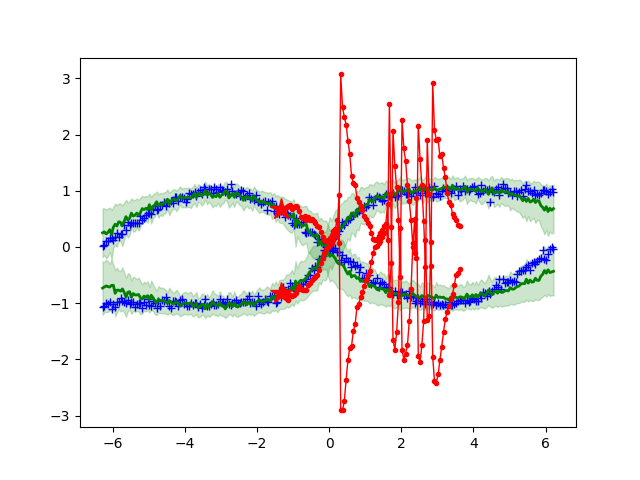

In [9]:
#see the prediction
y_test_pred_mean, y_test_pred_var = model.predict(x_test)
#now long-term prediction from a random point between (-np.pi/2, np.pi/2)
t0 = (np.random.rand() * 2*np.pi - np.pi)*.5
x0_dim_1 = nonlinearity_for_dim_1(t0) + np.random.randn()*.05
x0_dim_2 = nonlinearity_for_dim_2(t0) + np.random.randn()*.05
x0 = np.array([[x0_dim_1, x0_dim_2]])
n_steps = 100
t_future = np.arange(n_steps)*dt + t0
x_traj_mu, x_traj_var = model.predict_n_steps(n_steps, x0)
x_traj_mu = np.array(x_traj_mu)
x_traj_var = np.array(x_traj_var)
print(x_traj_mu.shape)
print(x_traj_var.shape)
# print(x_traj_var)

#show them
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_train[:-1], x_train, 'b+')
#one step prediction
ax.plot(t_test[:-1], y_test_pred_mean, 'g-', lw=2)
ax.fill_between(t_test[:-1], y_test_pred_mean[:, 0]-2*np.sqrt(y_test_pred_var[:, 0, 0]), y_test_pred_mean[:, 0]+2*np.sqrt(y_test_pred_var[:, 0, 0]),
               color='green', alpha=0.2)
ax.fill_between(t_test[:-1], y_test_pred_mean[:, 1]-2*np.sqrt(y_test_pred_var[:, 1, 1]), y_test_pred_mean[:, 1]+2*np.sqrt(y_test_pred_var[:, 1, 1]),
               color='green', alpha=0.2)

ax.plot(t0, x0[0, 0], 'r*', markersize=16)
ax.plot(t_future, x_traj_mu[:, 0, 0], 'r.-', lw=1)
ax.fill_between(t_future, x_traj_mu[:, 0, 0]-2*np.sqrt(x_traj_var[:, 0, 0, 0]), x_traj_mu[:, 0, 0]+2*np.sqrt(x_traj_var[:, 0, 0, 0]),
               color='red', alpha=0.2)

ax.plot(t0, x0[0, 1], 'r*', markersize=16)
ax.plot(t_future, x_traj_mu[:, 0, 1], 'r.-', lw=1)
ax.fill_between(t_future, x_traj_mu[:, 0, 1]-2*np.sqrt(x_traj_var[:, 0, 1, 1]), x_traj_mu[:, 0, 1]+2*np.sqrt(x_traj_var[:, 0, 1, 1]),
               color='red', alpha=0.2)